In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read dataset
dataframe = pd.read_csv("scaler_clustering.csv")

In [4]:
dataframe.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [5]:
dataframe.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [7]:
dataframe.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


AVG CTC is *2.271685e+06*

In [8]:
# NA values
dataframe.isnull().sum()

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

'Unnamed 0’- Index of the dataset
Email_hash- Anonymised Personal Identifiable Information (PII)
Company_hash - This represents an anonymized identifier for the company, which is the current employer of the learner.
orgyear- Employment start date
CTC- Current CTC
Job_position- Job profile in the company
CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)

Null value handling using KNNImputer

In [9]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Replace NaN values in Age and Gender with np.nan
dataframe['company_hash'] = dataframe['company_hash'].fillna(np.nan)
dataframe['orgyear'] = dataframe['orgyear'].fillna(np.nan)
dataframe['job_position'] = dataframe['job_position'].fillna(np.nan)

# Handle categorical variables if needed
encoder = LabelEncoder()
dataframe['company_hash'] = encoder.fit_transform(dataframe['company_hash'].astype(str))
dataframe['orgyear'] = encoder.fit_transform(dataframe['orgyear'].astype(str))
dataframe['job_position'] = encoder.fit_transform(dataframe['job_position'].astype(str))

# Select the columns to impute
columns_to_impute = ['company_hash', 'orgyear', 'job_position']

# Create a KNN imputer
imputer = KNNImputer(n_neighbors=7)
# Fit and transform the data
dataframe[columns_to_impute] = imputer.fit_transform(dataframe[columns_to_impute])

# Check for missing values
dataframe.isnull().sum()


Unnamed: 0          0
company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [10]:
dataframe['email_hash'].value_counts()

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
                                                                    ..
bb2fe5e655ada7f7b7ac4a614db0b9c560e796bdfcaa4e5367e69eedfea93876     1
d6cdef97e759dbf1b7522babccbbbd5f164a75d1b4139e02c945958720f1ed79     1
700d1190c17aaa3f2dd9070e47a4c042ecd9205333545dbfaee0f85644d00306     1
c2a1c9e4b9f4e1ed7d889ee4560102c1e2235b2c1a0e59cea95a6fe55c658407     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: count, Length: 153443, dtype: int64

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b this mail is used 10 times

Remove special characters from the dataset by using Regex

In [11]:
import re

def remove_special_chars(text):
    if isinstance(text, str):
        return re.sub('[^A-Za-z0-9 ]+', '', text)
    return text

dataframe['email_hash'] = dataframe['email_hash'].apply(remove_special_chars)
dataframe['company_hash'] = dataframe['company_hash'].apply(remove_special_chars)

In [12]:
dataframe.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,969.0,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,47.0,1100000,457.0,2020.0
1,1,19730.0,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,50.0,449999,292.0,2019.0
2,2,15512.0,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,46.0,2000000,140.0,2020.0
3,3,12108.0,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,49.0,700000,140.0,2019.0
4,4,20226.0,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,49.0,1400000,292.0,2019.0


In [14]:
# Check for duplicates based on all columns
duplicates = dataframe[dataframe.duplicated()]

# Drop duplicates
dataframe.drop_duplicates(inplace=True)

In [15]:
import datetime as dt
# Get the current year
current_year = dt.datetime.now().year

# Calculate years of experience
dataframe['Years_of_Experience'] = current_year - dataframe['orgyear']

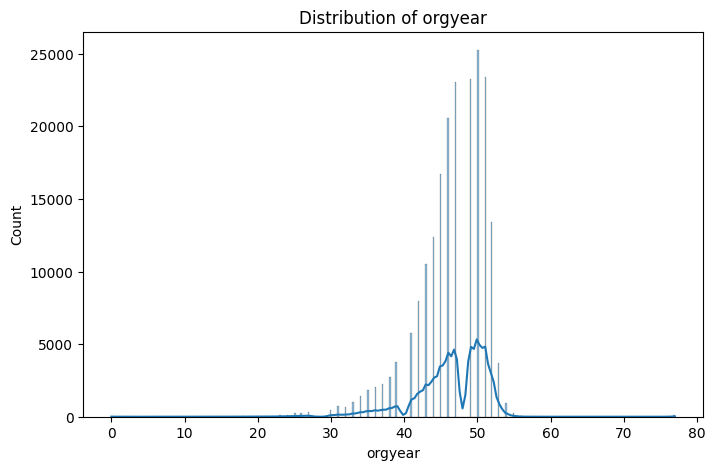

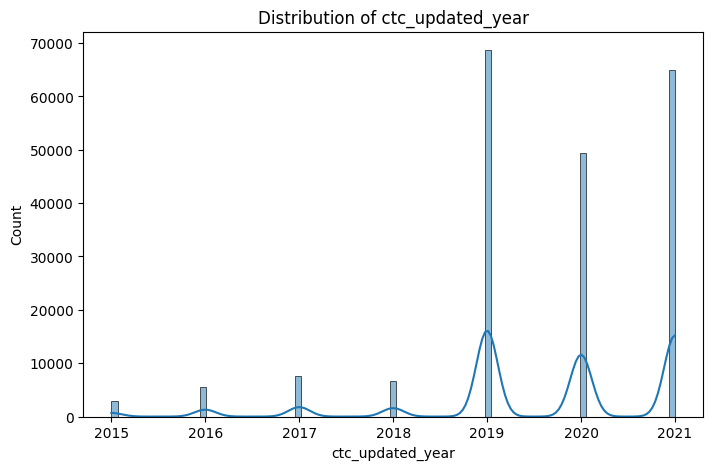

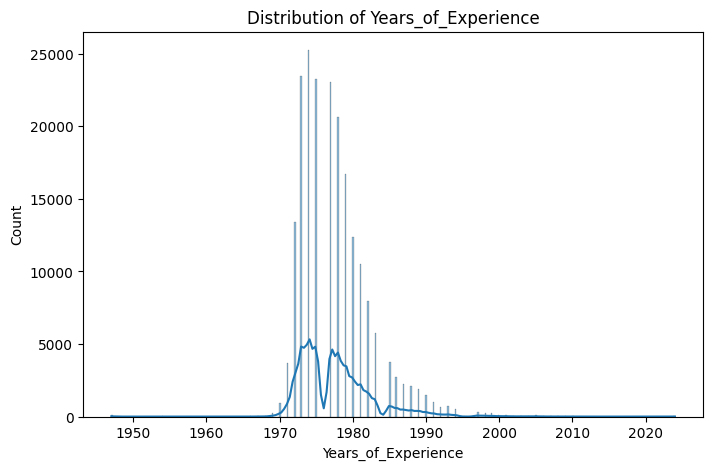

In [16]:
# Univariate Analysis: Distribution plots for continuous variables
cont_vars = ['orgyear',  'ctc_updated_year', 'Years_of_Experience']
for var in cont_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(dataframe[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

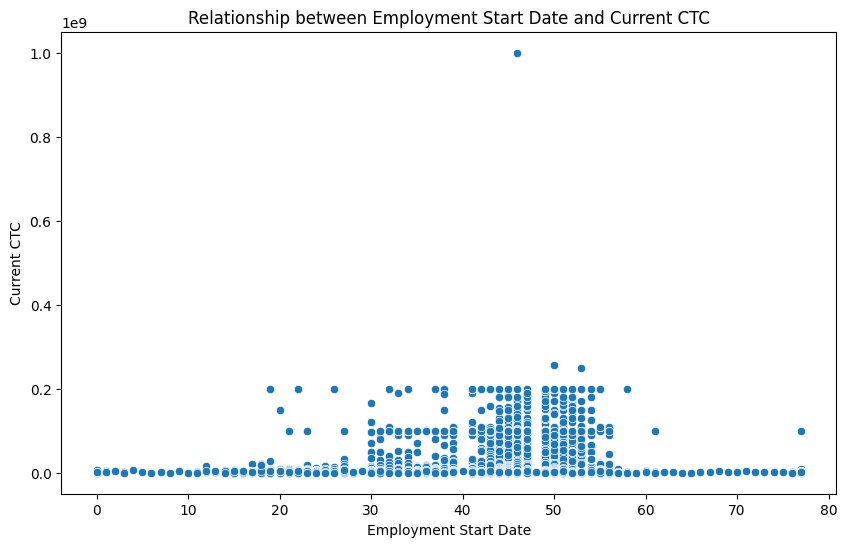

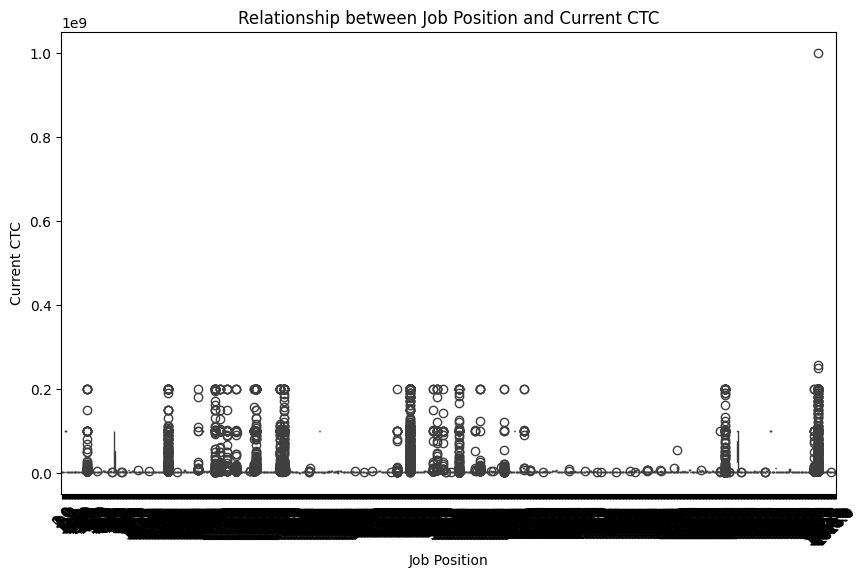

In [58]:
# Bivariate Analysis: Relationships between variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x='orgyear', y='ctc')
plt.title('Relationship between Employment Start Date and Current CTC')
plt.xlabel('Employment Start Date')
plt.ylabel('Current CTC')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=dataframe, x='job_position', y='ctc')
plt.title('Relationship between Job Position and Current CTC')
plt.xlabel('Job Position')
plt.ylabel('Current CTC')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Drop 'Unnamed 0' column
dataframe.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_hash         205843 non-null  float64
 1   email_hash           205843 non-null  object 
 2   orgyear              205843 non-null  float64
 3   ctc                  205843 non-null  int64  
 4   job_position         205843 non-null  float64
 5   ctc_updated_year     205843 non-null  float64
 6   Years_of_Experience  205843 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 11.0+ MB


#Data Pre-processing

In [19]:
# Label Encoding for categorical attributes
cat_cols = dataframe.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
dataframe[cat_cols] = dataframe[cat_cols].apply(encoder.fit_transform)

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Standardization (scaling) of numerical features
scaler = StandardScaler()
num_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns
dataframe[num_cols] = scaler.fit_transform(dataframe[num_cols])

In [20]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_hash         205843 non-null  float64
 1   email_hash           205843 non-null  float64
 2   orgyear              205843 non-null  float64
 3   ctc                  205843 non-null  float64
 4   job_position         205843 non-null  float64
 5   ctc_updated_year     205843 non-null  float64
 6   Years_of_Experience  205843 non-null  float64
dtypes: float64(7)
memory usage: 11.0 MB


In [21]:

dataframe.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience
0,-1.659633,-0.247559,0.108679,-0.099288,-0.066248,0.280559,-0.108679
1,0.009161,0.658439,0.716997,-0.154369,-0.545862,-0.474101,-0.716997
2,-0.366031,-0.755173,-0.094093,-0.023022,-0.987688,0.280559,0.094093
3,-0.668817,1.515353,0.514224,-0.133184,-0.987688,-0.474101,-0.514224
4,0.053280,-0.220307,0.514224,-0.073866,-0.545862,-0.474101,-0.514224


**Manual Clustering** Criteria: Determine the criteria for clustering learners, such as job positions, years of experience, company size, or salary levels.
**Group Learners**: Manually group learners based on the defined criteria into distinct clusters, assigning a cluster label to each group.

**Creating Designation Flag & Insights**
Define Designation Categories: Decide on designation categories such as full stack, backend, frontend.
Assign Designation Flag: Create a new column (Designation_Flag) in the dataset and assign the appropriate designation flag to each learner based on their job position.
Generate Insights: Analyze the distribution of learners across different designation flags to understand the composition of workforce levels. Identify trends, such as the proportion of senior professionals or entry-level employees.

**Creating Class Flag & Insights**
Define Class Categories: Determine class categories such as technical roles, managerial roles, executive roles, etc., based on job responsibilities and seniority.
Assign Class Flag: Create a new column (Class_Flag) in the dataset and assign the appropriate class flag to each learner based on their job position and designation.
Generate Insights: Analyze the distribution of learners across different class flags to understand the diversity of roles and responsibilities within the organization. Identify trends, such as the percentage of technical roles versus managerial roles.

**Creating Tier Flag & Insights**
Define Tier Categories: Define tier categories such as junior tier, mid-tier, senior tier, etc., based on factors like experience, salary levels, and seniority.
Assign Tier Flag: Create a new column (Tier_Flag) in the dataset and assign the appropriate tier flag to each learner based on their years of experience, current CTC, and designation.
Generate Insights: Analyze the distribution of learners across different tier flags to understand the hierarchy and career progression levels within the organization. Identify trends, such as the growth of talent in senior tiers or potential talent gaps in junior tiers.

In [22]:
from sklearn.neighbors import NearestNeighbors


# Assuming 'X' contains the features you want to check clustering tendency for
X = dataframe[['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year', 'Years_of_Experience']].values

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)


In [23]:

# Calculate the Hopkins statistic
def hopkins_statistic(data, n_samples=100):
    d = data.shape[1]
    n = len(data)
    m = int(0.1 * n)  # Using 10% of the sample size
    feature_names = dataframe[['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year', 'Years_of_Experience']].columns
    nbrs = NearestNeighbors(n_neighbors=1).fit(data)

    rand_data = np.random.rand(n_samples, d)
    ujd = []
    wjd = []
    for j in range(n_samples):
        u_dist, _ = nbrs.kneighbors(rand_data[j:j+1])
        ujd.append(u_dist.mean())
        w_dist, _ = nbrs.kneighbors(data[np.random.choice(range(n), m, replace=False)])
        wjd.append(w_dist.mean())
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    return H

hopkins_score = hopkins_statistic(scaled_features)
print("Hopkins Statistic:", hopkins_score)


Hopkins Statistic: 1.0


A value close to 1 suggests that the data has a high tendency to cluster, meaning that there are meaningful clusters in the data that can be identified by clustering algorithms.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

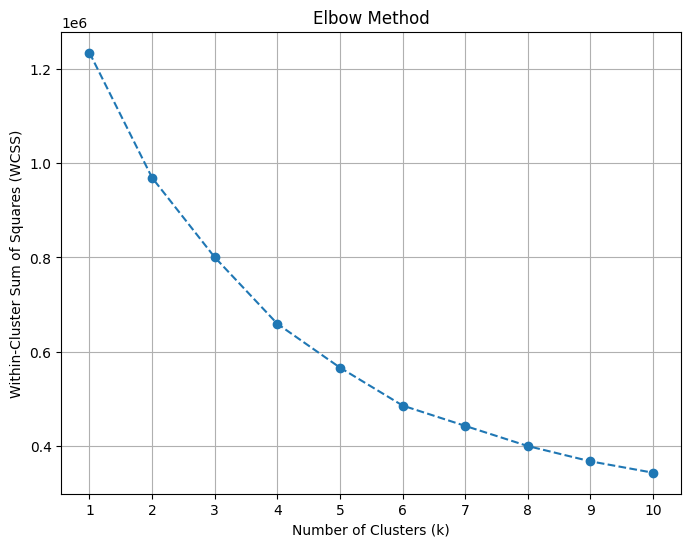

In [24]:
from sklearn.cluster import KMeans

# Elbow Method to find the optimal number of clusters (k)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

 Elbow Method suggests that the optimal number of clusters is 7, it means that the within-cluster sum of squares (WCSS) decreases significantly up to 7 clusters and then the rate of decrease slows down beyond that point.

In [27]:
from sklearn.cluster import KMeans
# Assuming optimal_k is determined from the Elbow method
optimal_k = 7

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = kmeans.fit_predict(scaled_features)

# Add the cluster labels to your dataframe or dataset for further analysis
dataframe['Cluster_Labels_kmeans'] = clusters_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
dataframe.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_Experience,Cluster_Labels_kmeans
0,-1.659633,-0.247559,0.108679,-0.099288,-0.066248,0.280559,-0.108679,5
1,0.009161,0.658439,0.716997,-0.154369,-0.545862,-0.474101,-0.716997,5
2,-0.366031,-0.755173,-0.094093,-0.023022,-0.987688,0.280559,0.094093,5
3,-0.668817,1.515353,0.514224,-0.133184,-0.987688,-0.474101,-0.514224,5
4,0.053280,-0.220307,0.514224,-0.073866,-0.545862,-0.474101,-0.514224,4


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical clustering using Ward's method
linked = linkage(scaled_features, method='ward')

# Get cluster labels for 7 clusters
num_clusters = 7
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Add cluster labels to the dataframe
dataframe['Cluster_Labels_hierachical'] = cluster_labels

# Plot the hierarchical clustering dendrogram
plt.figure(figsize=(10, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
dataframe.head()